In [61]:
from flashbax.vault import Vault
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
v = Vault(
    rel_dir="experiment_results/ff_ippo/25-02-23/18-07-07/vaults",
    vault_name="jax_party",
    vault_uid="20250223180707",
)
buffer_state = v.read()

Loading vault found at /mnt/c/Users/ryanp/OneDrive/Documents/Jax-Party/experiment_results/ff_ippo/25-02-23/18-07-07/vaults/jax_party/20250223180707


In [62]:
# from jax_party import upload_folder

# upload_folder(
#     name="ippo_experiment",
#     description="IPPO, rank_based_reward = 1.0",
#     folder_path="experiment_results/ff_ippo/25-02-07/13-18-26"
# )

In [63]:
buffer_state.experience["action"].shape

(128, 3840, 4)

In [64]:
actions = buffer_state.experience["action"]
rewards = buffer_state.experience["reward"]
action_mask = buffer_state.experience["legal_action_mask"]

In [65]:
action_sum_per_agent = actions.reshape((-1, 3)).sum(axis=0)
action_sum_per_agent

Array([614290, 614532, 614457], dtype=int32)

[-286608.5  -287400.53 -286616.97]


<BarContainer object of 3 artists>

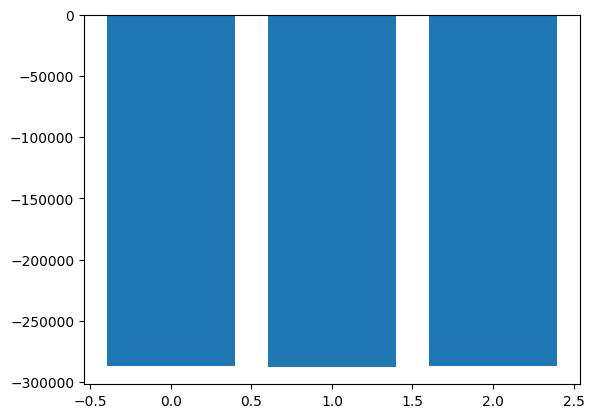

In [66]:
rewards_sum_per_agent = rewards.reshape((-1, 3)).sum(axis=0)
print(rewards_sum_per_agent)
plt.bar(jnp.arange(3), rewards_sum_per_agent)

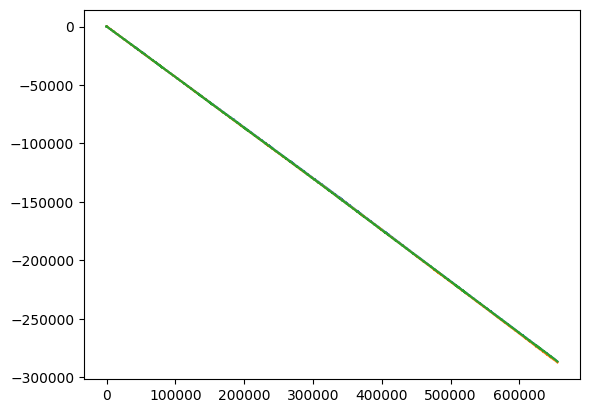

In [67]:
plt.plot(rewards.reshape((-1, 3)).cumsum(0))

In [ ]:
rewards.reshape((-1, 3)).cumsum(0)[-400:][:, (0, 2)].shape

(400, 2)

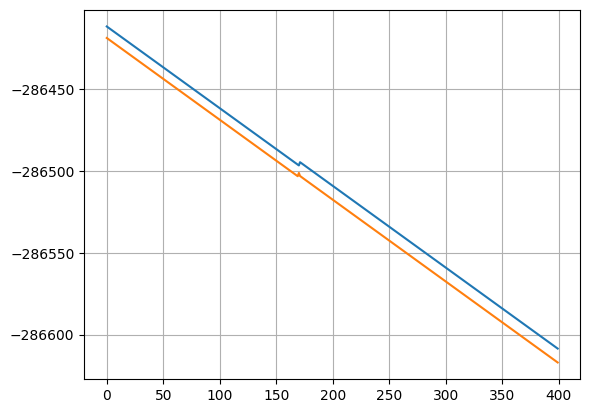

In [84]:
plt.plot(rewards.reshape((-1, 3)).cumsum(0)[-400:][:, (0, 2)])
plt.grid()

In [69]:
jax.tree.map(
    lambda x: x.reshape(-1, x.shape[-1])[:3],
    (jnp.int8(action_mask), actions, rewards),
)

(Array([[1, 1],
        [1, 1],
        [1, 1]], dtype=int8),
 Array([[1, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 0, 0]], dtype=int32),
 Array([[-0.49035496, -0.5096451 , -0.49954823, -0.50045174],
        [-0.50769526, -0.49230474, -0.5032629 , -0.49673706],
        [ 1.9994634 ,  2.0005367 , -2.0037444 , -1.9962556 ]],      dtype=float32))